In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-methane-emissions/Methane_final.csv


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
gme = pd.read_csv('/kaggle/input/global-methane-emissions/Methane_final.csv')
gme.head()

,Unnamed: 0,region,country,emissions,type,segment,reason,baseYear,notes
0,0,Africa,Algeria,257.611206,Agriculture,Total,All,2019-2021,Average based on United Nations Framework Conv...
1,1,Africa,Algeria,0.052000,Energy,Bioenergy,All,2022,Estimates from end-uses are for 2020 or 2021 (...
2,2,Africa,Algeria,130.798996,Energy,Gas pipelines and LNG facilities,Fugitive,2022,Not available
3,3,Africa,Algeria,69.741898,Energy,Gas pipelines and LNG facilities,Vented,2022,Not available
4,4,Africa,Algeria,213.987000,Energy,Onshore gas,Fugitive,2022,Not available


In [33]:
gme.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1548.0,773.500000,447.013423,0.000000,386.750000,773.500000,1160.250000,1547.000000
emissions,1548.0,643.255972,5566.238201,0.000459,2.659361,24.064669,128.419594,141953.765625


In [34]:
gme.isnull().sum()

Unnamed: 0    0
region        0
country       0
emissions     0
type          0
segment       0
reason        0
baseYear      0
notes         0
dtype: int64

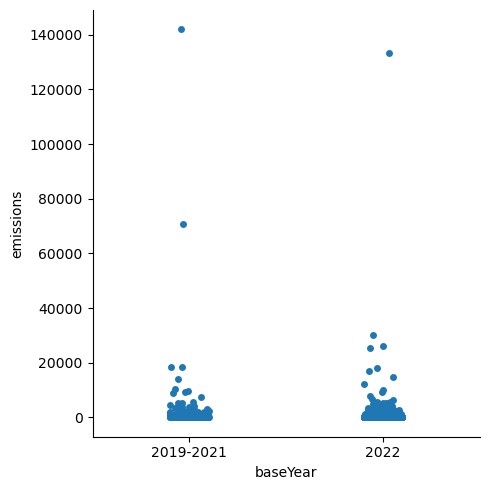

In [35]:
sns.catplot(x="baseYear",y="emissions",data=gme,)

<Axes: xlabel='emissions'>

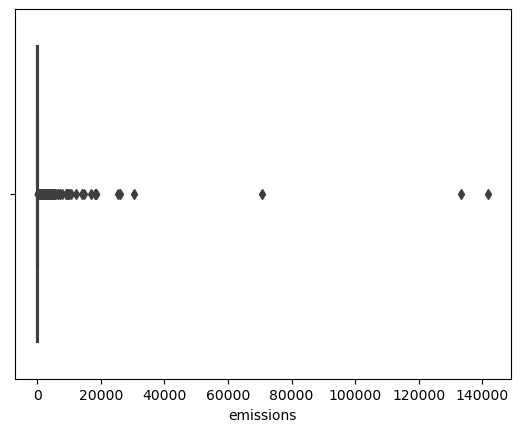

In [36]:
sns.boxplot(x=gme["emissions"]) #Aykırı degerleri düzenle

<Axes: xlabel='baseYear', ylabel='emissions'>

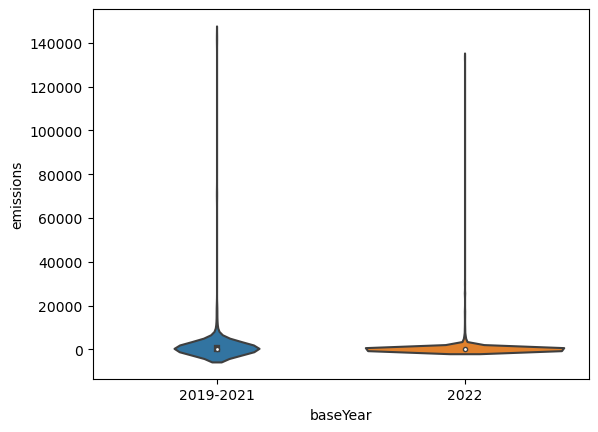

In [37]:
sns.violinplot(x="baseYear", y = "emissions",data=gme)

In [5]:
filtre = (gme["region"] !="World") & (gme["segment"]!="Total")&(gme["reason"]!="All")
filtre1 = gme[filtre].copy()

<Axes: xlabel='region', ylabel='Count'>

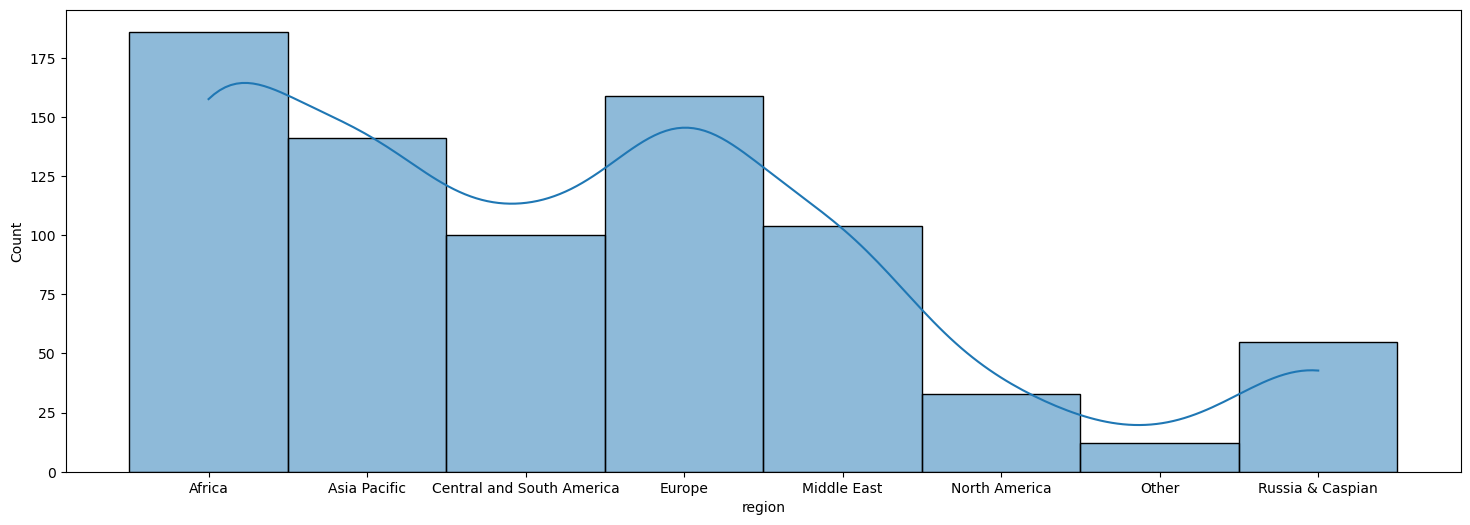

In [39]:
plt.figure(figsize=(18,6))
sns.histplot(filtre1["region"],kde=True)

<Axes: xlabel='segment', ylabel='count'>

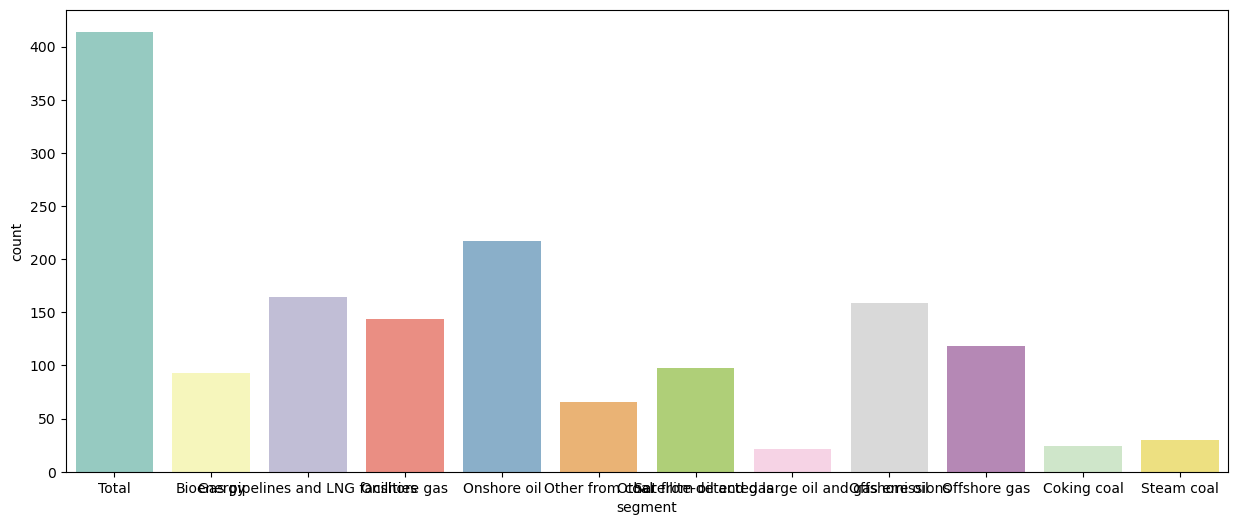

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x = gme["segment"],palette='Set3')

<Axes: xlabel='segment', ylabel='count'>

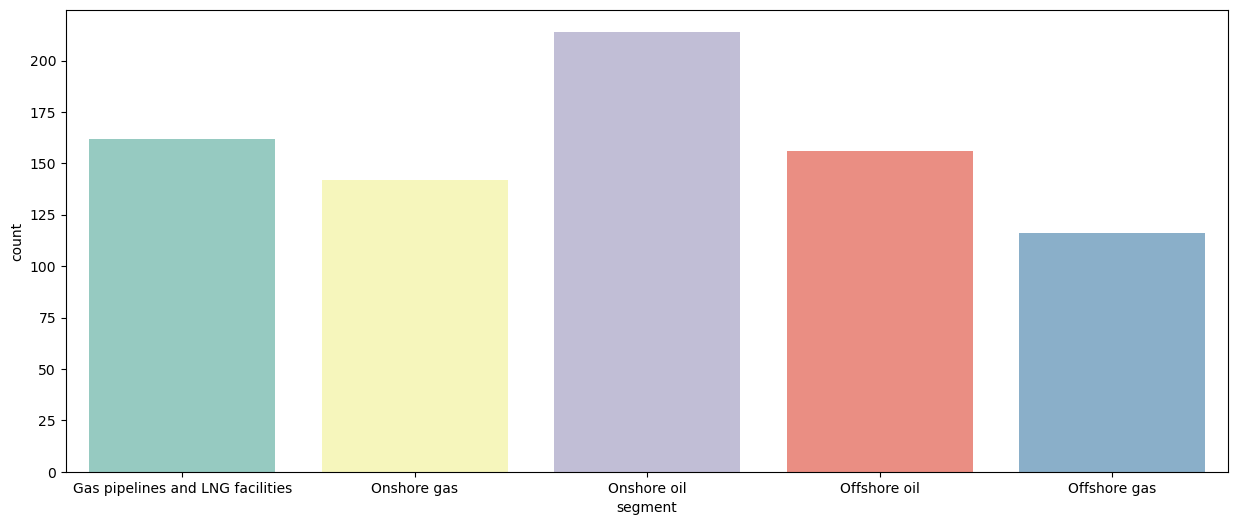

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(x = filtre1["segment"],palette='Set3') #Kategorik segmentleri le ile kodlandır ve işlem yap

<Axes: xlabel='segment', ylabel='count'>

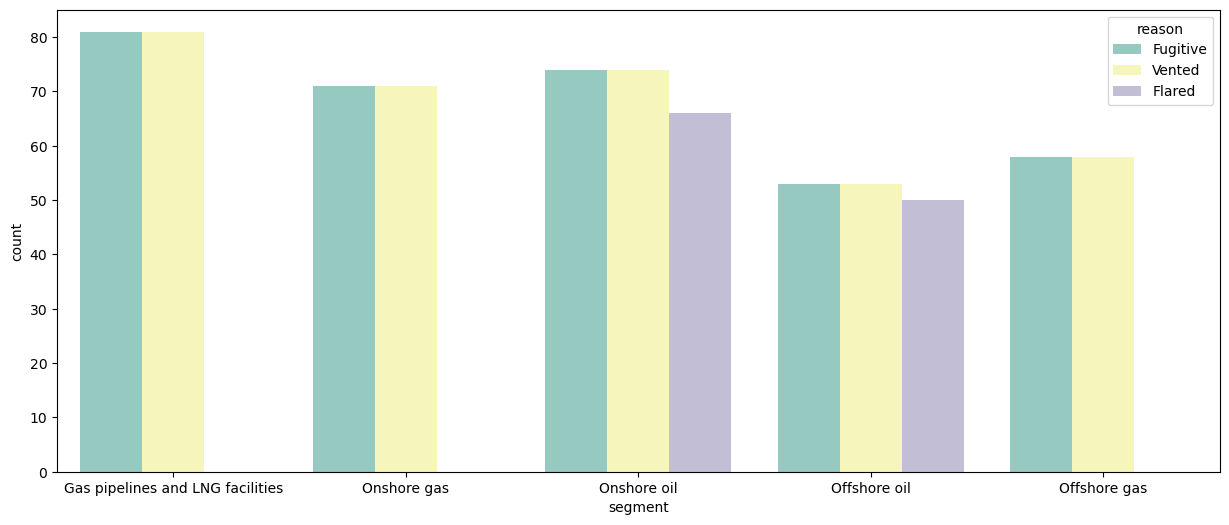

In [7]:
plt.figure(figsize=(15,6))
sns.countplot(x = filtre1["segment"],hue=filtre1["reason"],palette='Set3')

<Axes: xlabel='region', ylabel='emissions'>

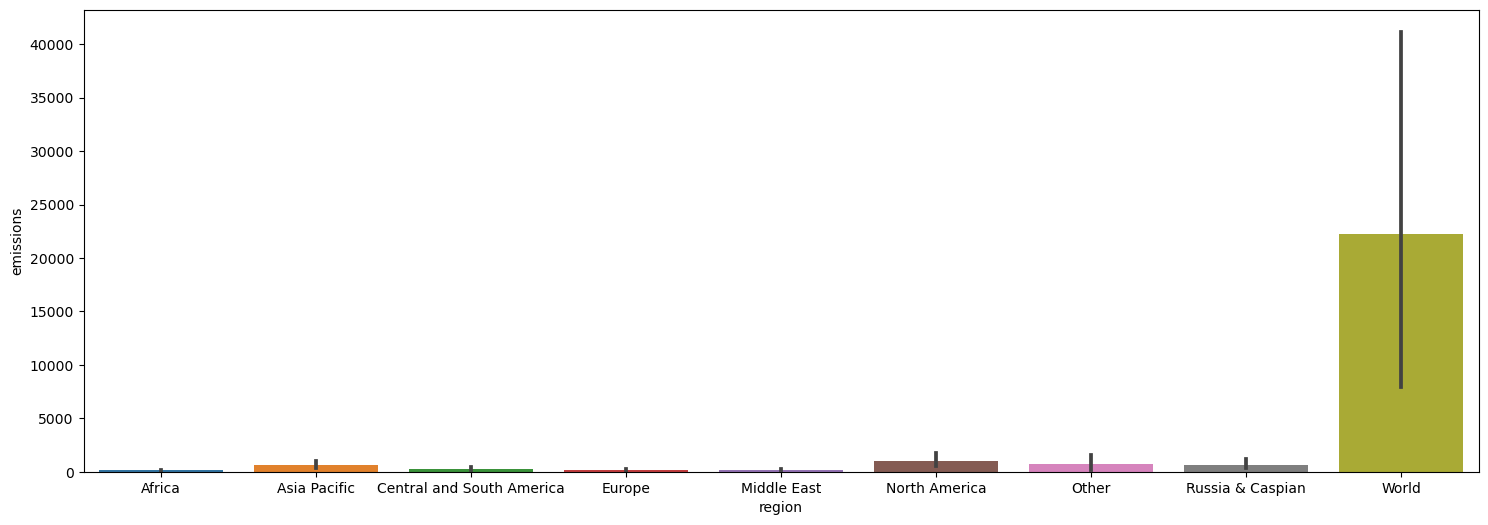

In [11]:
plt.figure(figsize=(18,6))
sns.barplot(x="region",y="emissions", data=gme)

<Axes: xlabel='region', ylabel='emissions'>

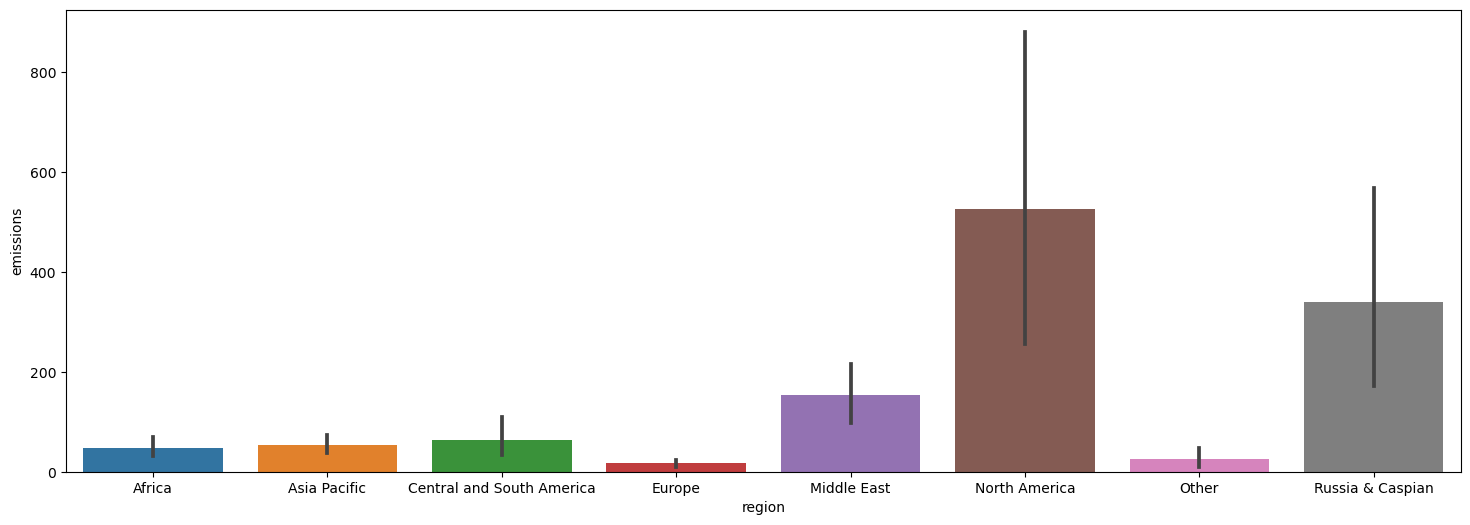

In [42]:
plt.figure(figsize=(18,6))
sns.barplot(x="region",y="emissions", data=filtre1)

<Axes: xlabel='region', ylabel='emissions'>

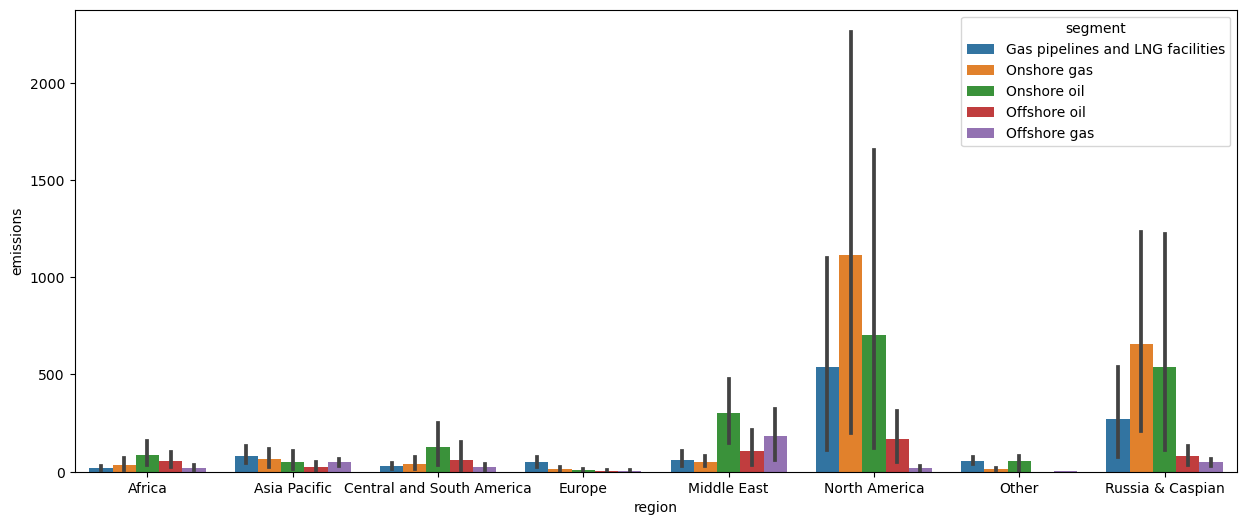

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x="region",y="emissions",hue="segment", data=filtre1)

<Axes: xlabel='region', ylabel='emissions'>

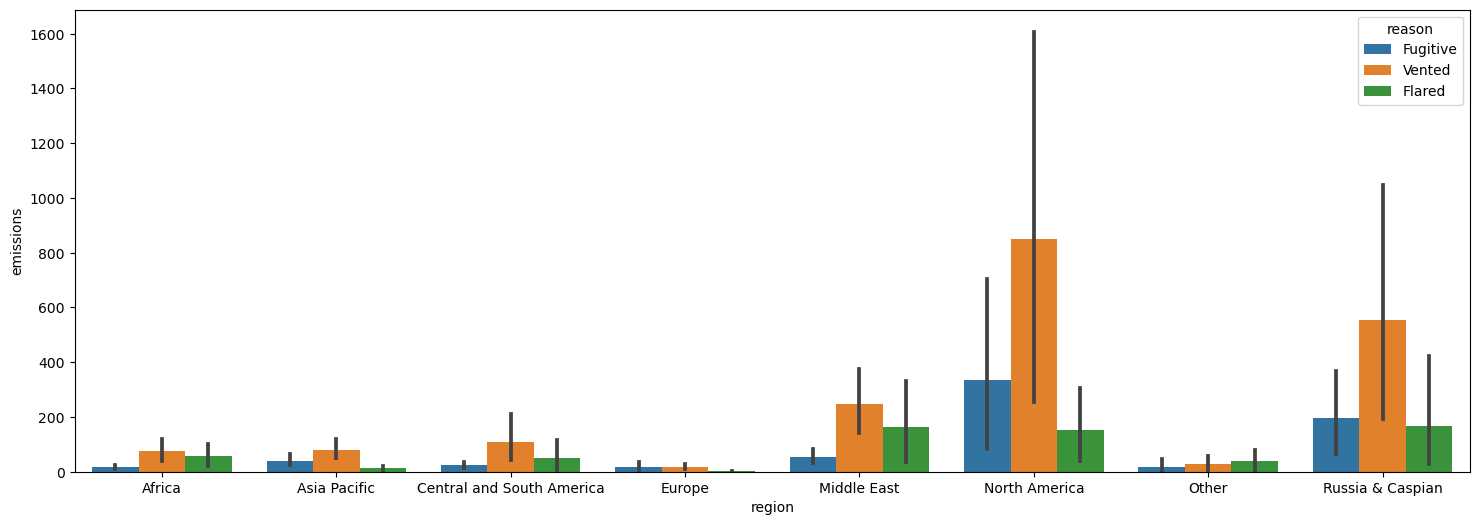

In [44]:
plt.figure(figsize=(18,6))
#px.bar(filtre1,x="segment",y="emissions",color="reason")
sns.barplot(x="region",y="emissions", hue="reason", data=filtre1)

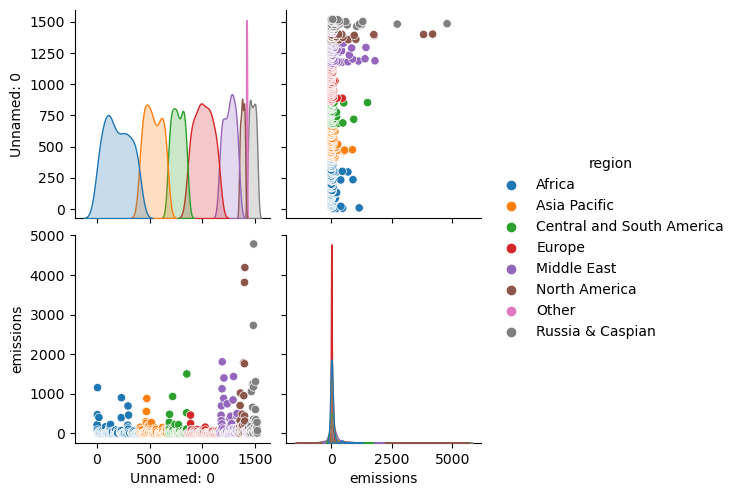

In [45]:
sns.pairplot(filtre1,hue="region")

<Axes: xlabel='region', ylabel='emissions'>

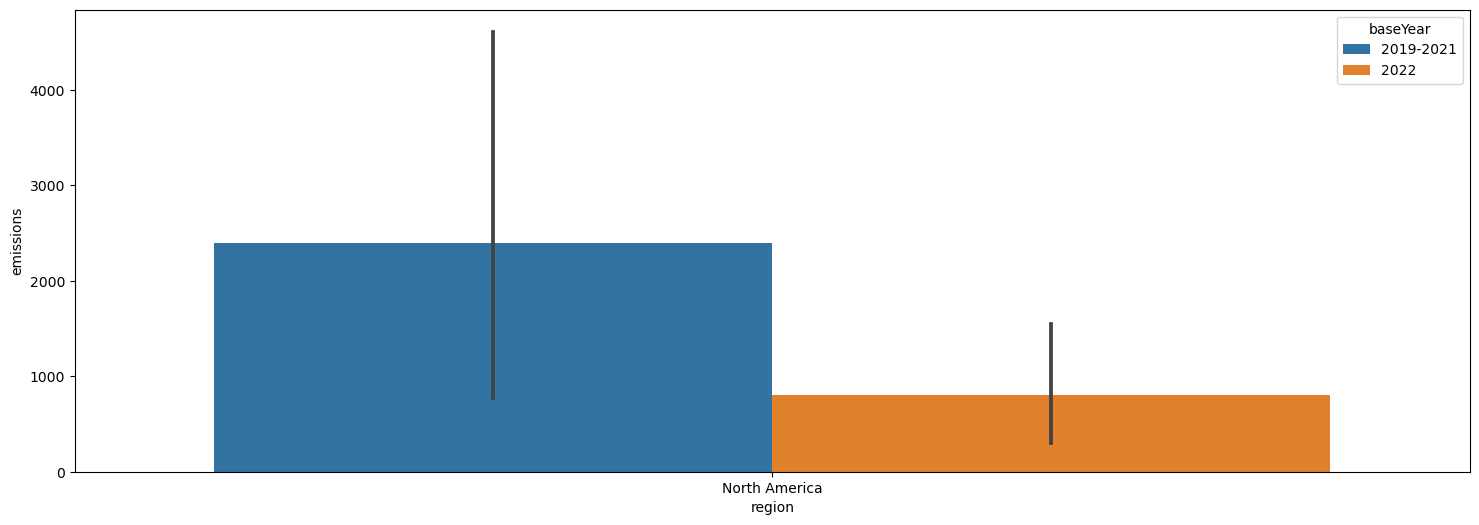

In [46]:
plt.figure(figsize=(18,6))
north_america_df = gme[gme["region"] == "North America"].copy()
sns.barplot(x="region",y="emissions", hue="baseYear",data = north_america_df)

Data Modelling

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [193]:
X = filtre1['region']
X = pd.get_dummies(X,columns=['region'])
y = filtre1['emissions']

In [194]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [195]:
y_pred = model.predict(X)

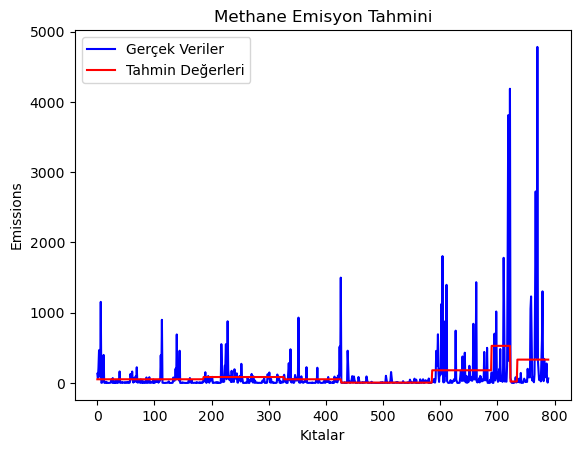

In [199]:
plt.plot(range(len(y)), y, color='blue', label='Gerçek Veriler')
plt.plot(range(len(y)), y_pred, color='red', label='Tahmin Değerleri')
plt.xlabel('Kıtalar')
plt.ylabel('Emissions')
plt.title('Methane Emisyon Tahmini')
plt.legend()
plt.show()

In [197]:
np.sqrt(mean_squared_error(y, y_pred))

327.61839241570084

In [198]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print("R^2 Skoru:", r2)

R^2 Skoru: 0.11772576419533376


Data Modeling With Split

In [202]:
df = pd.read_csv('/kaggle/input/global-methane-emissions/Methane_final.csv')

In [203]:
X = df['region']
X = pd.get_dummies(X, columns=['region'])
y = df['emissions']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [212]:
y_pred = model.predict(X_train)

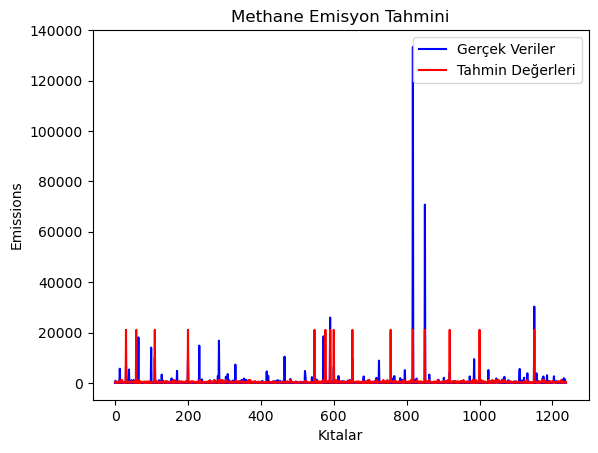

In [219]:
plt.plot(range(len(y_train)), y_train, color='blue', label='Gerçek Veriler')
plt.plot(range(len(y_train)), y_pred, color='red', label='Tahmin Değerleri')
plt.xlabel('Kıtalar')
plt.ylabel('Emissions')
plt.title('Methane Emisyon Tahmini')
plt.legend()
plt.show()

In [216]:
np.sqrt(mean_squared_error(y_train, y_pred))

4035.1251265999367

In [217]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred)
print("R^2 Skoru:", r2)

R^2 Skoru: 0.2425769640072426
